In [103]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sb
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True

### Description
1. Identify the variables
2. Univariate Analysis <br>
   2.1 We want to predict house price base on columns: LotArea, YearBuilt, 1stFlrSF, 2ndFlrSF, FullBath, BedroomAbvGr, TotRmsAbvGrd. Please analyze these fields
3. Bi-variate Analysis
4. Missing values
5. Outlier values


In [104]:
dataset = pd.read_csv("data/housing_prices/train.csv")

In [105]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [106]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [107]:
print("Target variable:", "salePrice")

Target variable: salePrice


In [108]:
print("Predict variable:")

Predict variable:


In [109]:
', '.join(dataset.columns[dataset.columns != "SalePrice"])

'Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition'

# 1. Identify the variables

# Data Type

### Numeric Type

In [110]:
numbers = [f for f in dataset.columns if dataset.dtypes[f] != 'object']
", ".join(numbers)

'Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice'

### Character / String

In [111]:
objects = [f for f in dataset.columns if dataset.dtypes[f] == 'object']
", ".join(objects)

'MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition'

# Variable

### Categorical

In [112]:
i = 1
for obj in objects:
    print(i, obj, "\t", len(dataset[obj].unique()), dataset[obj].unique())
    i = i + 1

1 MSZoning 	 5 ['RL' 'RM' 'C (all)' 'FV' 'RH']
2 Street 	 2 ['Pave' 'Grvl']
3 Alley 	 3 [nan 'Grvl' 'Pave']
4 LotShape 	 4 ['Reg' 'IR1' 'IR2' 'IR3']
5 LandContour 	 4 ['Lvl' 'Bnk' 'Low' 'HLS']
6 Utilities 	 2 ['AllPub' 'NoSeWa']
7 LotConfig 	 5 ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
8 LandSlope 	 3 ['Gtl' 'Mod' 'Sev']
9 Neighborhood 	 25 ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
10 Condition1 	 9 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
11 Condition2 	 8 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
12 BldgType 	 5 ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
13 HouseStyle 	 8 ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
14 RoofStyle 	 6 ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
15 RoofMatl 	 8 ['CompShg' 'W

### Categorical & Continuous

In [113]:
for col in numbers:
    if (len(dataset[col].unique()) < 150):
        print(col, "\t", len(dataset[col].unique()), ":", dataset[col].unique())
    

MSSubClass 	 15 : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
LotFrontage 	 111 : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
OverallQual 	 10 : [ 7  6  8  5  9  4 10  3  1  2]
OverallCond 	 9 : [5 8 6 7 4 2 3 9 1]
YearBuilt 	 112 : [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 

# 2. Univariate Analysis following  these columns: 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'

In [114]:
new_dataset = dataset[['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']]

In [115]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
LotArea         1460 non-null int64
YearBuilt       1460 non-null int64
1stFlrSF        1460 non-null int64
2ndFlrSF        1460 non-null int64
FullBath        1460 non-null int64
BedroomAbvGr    1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
dtypes: int64(7)
memory usage: 79.9 KB


In [116]:
new_dataset.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


In [117]:
for col in new_dataset.columns:
    if (len(new_dataset[col].unique()) < 150):
        print(col, len(new_dataset[col].unique()), ": ", new_dataset[col].unique()) 

YearBuilt 112 :  [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
FullBath 4 :  [2 1 3 0]
BedroomAbvGr 8 :  [3 4 1 2 0 5 6 8]
TotRmsAbvGrd 12 :  [ 8  6  7  9  5 11  4 10 12  3  2 14]


### Continous Data:
* LotArea
* 1stFlrSF
* 2ndFlrSF

In [118]:
def continous_analysis(data, col):
    colSeri = data[data[col].isnull() != True][col]
    
    colSkew = colSeri.skew()
    colKur = colSeri.kurtosis()
    print('*****', col, '*****')
    print(col,"mean:", colSeri.mean())
    print(col,"median:", colSeri.median())
    print(col, "mode:", colSeri.mode().values)
    print(col, "range:", colSeri.ptp())
    print(col, "variance:", colSeri.var())
    print(col, "std:", colSeri.std())
    print(col, "skew:", colSkew)
    print(col, "kur:", colKur)
    if (colSkew > 0): 
        print(col, "phân phối lệch phải")
    elif (colSkew < 0):
        print(col, "phân phối lệch trái")
    else:
        print(col, "phân phối đối xứng")
        
    if (colKur > 0): 
        print(col, "phân phối nhọn hơn pp chuẩn")
    elif (colKur < 0):
        print(col, "phân phối thấp hơn pp chuẩn")
    else:
        print(col, "phân phối chuẩn")
    
    
    print("\n")

In [119]:
continous_col = ['LotArea', '1stFlrSF', '2ndFlrSF']
continous_data = new_dataset[continous_col]
for col in continous_col:
    continous_analysis(continous_data, col)

***** LotArea *****
LotArea mean: 10516.828082191782
LotArea median: 9478.5
LotArea mode: [7200]
LotArea range: 213945
LotArea variance: 99625649.65034176
LotArea std: 9981.26493237915
LotArea skew: 12.207687851233496
LotArea kur: 203.24327101886033
LotArea phân phối lệch phải
LotArea phân phối nhọn hơn pp chuẩn


***** 1stFlrSF *****
1stFlrSF mean: 1162.626712328767
1stFlrSF median: 1087.0
1stFlrSF mode: [864]
1stFlrSF range: 4358
1stFlrSF variance: 149450.07920371433
1stFlrSF std: 386.5877380410744
1stFlrSF skew: 1.3767566220336365
1stFlrSF kur: 5.74584148244079
1stFlrSF phân phối lệch phải
1stFlrSF phân phối nhọn hơn pp chuẩn


***** 2ndFlrSF *****
2ndFlrSF mean: 346.99246575342465
2ndFlrSF median: 0.0
2ndFlrSF mode: [0]
2ndFlrSF range: 2065
2ndFlrSF variance: 190557.07533730177
2ndFlrSF std: 436.5284358862568
2ndFlrSF skew: 0.8130298163023265
2ndFlrSF kur: -0.5534635576075795
2ndFlrSF phân phối lệch phải
2ndFlrSF phân phối thấp hơn pp chuẩn




/home/dat-tran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  # Remove the CWD from sys.path while we load stuff.


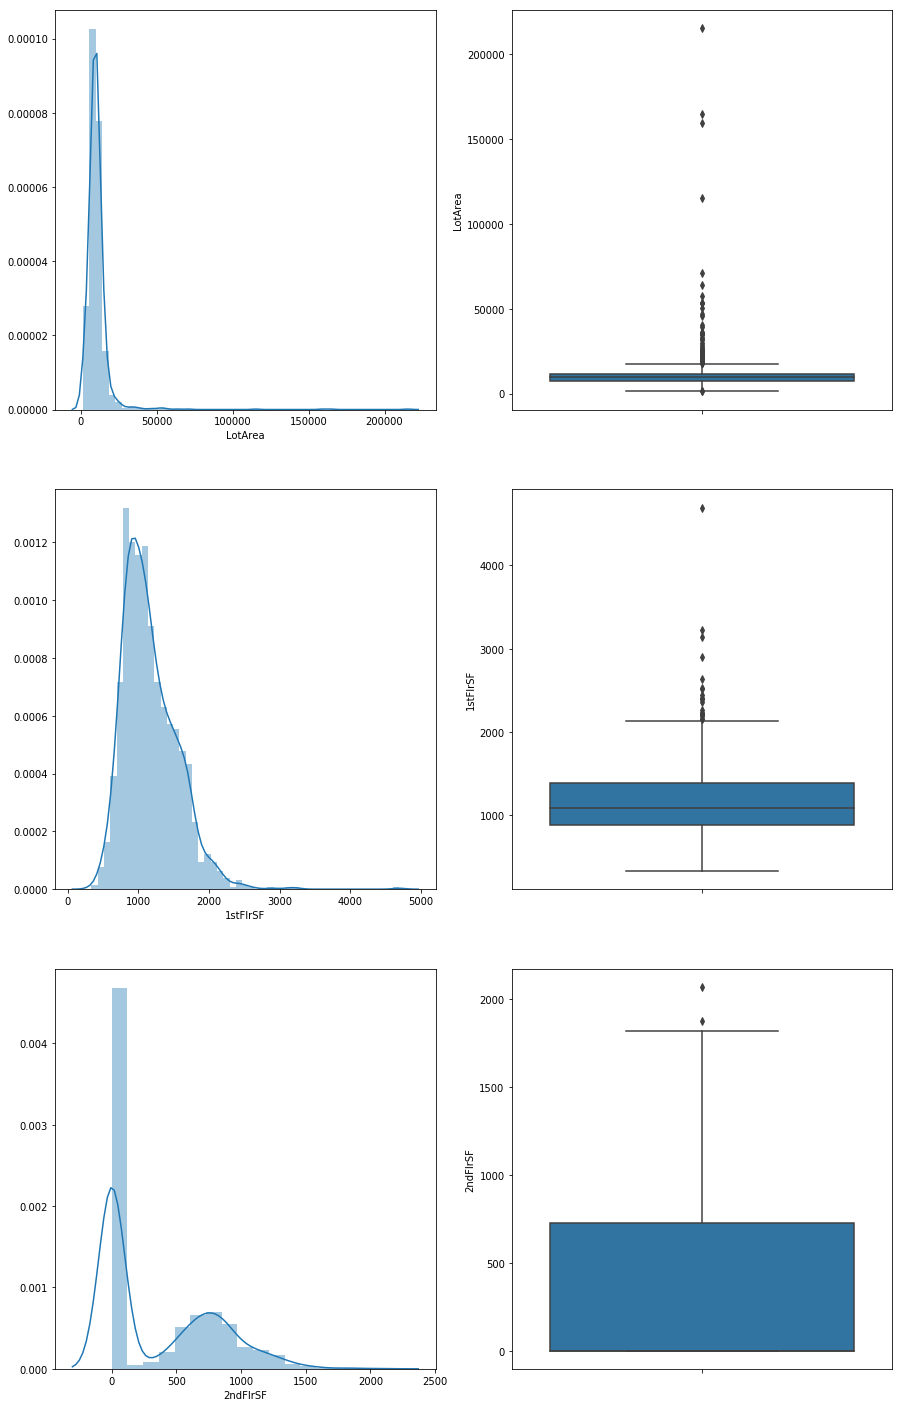

In [120]:
plt.figure(figsize=(15,25))
plt.subplot(3,2,1)
sb.distplot(continous_data['LotArea'])
plt.subplot(3,2,2)
sb.boxplot(continous_data['LotArea'], orient="v")
plt.subplot(3,2,3)
sb.distplot(continous_data['1stFlrSF'])
plt.subplot(3,2,4)
sb.boxplot(continous_data['1stFlrSF'], orient="v")
plt.subplot(3,2,5)
sb.distplot(continous_data['2ndFlrSF'])
plt.subplot(3,2,6)
sb.boxplot(continous_data['2ndFlrSF'], orient="v")

In [141]:
def continous_outlier(data, col):
    q1 = np.percentile(data[col], 25)
    q3 = np.percentile(data[col], 75)
    iqr = scipy.stats.iqr(data[col])
    upper = data[data[col] > (q3 + 1.5 * iqr)]
    lower = data[data[col] < (q1 - 1.5 * iqr)]
    outlier_per = np.round((len(upper) + len(lower)) / len(data), 4) * 100
    print(col, "upper count:", len(upper))
    print(col, "lower count:", len(lower))
    print(col, "outlier on total:", outlier_per, "%")
    print(col, "upper outier are:", upper[col].values)
    print(col, "lower outier are:", lower[col].values)

In [142]:
for col in continous_col:
    print("------------------------------------")
    continous_outlier(continous_data, col)
    

------------------------------------
LotArea upper count: 67
LotArea lower count: 2
LotArea outlier on total: 4.73 %
LotArea upper outier are: [ 50271  19900  21000  21453  19378  31770  22950  25419 159000  19296
  39104  19138  18386 215245 164660  20431  18800  53107  34650  22420
  21750  70761  53227  40094  32668  21872  21780  25095  46589  20896
  18450  21535  26178 115149  21695  53504  21384  28698  45600  17920
  25286  27650  24090  25000  21286  21750  29959  18000  23257  17755
  35760  18030  35133  32463  18890  24682  23595  17871  36500  63887
  20781  25339  57200  20544  19690  21930  26142]
LotArea lower outier are: [1300 1477]
------------------------------------
1stFlrSF upper count: 20
1stFlrSF lower count: 0
1stFlrSF outlier on total: 1.37 %
1stFlrSF upper outier are: [2207 2223 2259 2158 2234 2392 2402 3228 3138 2515 2444 2217 2364 2898
 2524 2411 2196 4692 2156 2633]
1stFlrSF lower outier are: []
------------------------------------
2ndFlrSF upper count: 2
2

### Categorical Data:
* YearBuilt
* FullBath
* BedroomAbvGr
* TotRmsAbvGrd

In [123]:
category_col = ["YearBuilt", "FullBath", "BedroomAbvGr", "TotRmsAbvGrd"]

In [124]:
yearBuiltGroupBy = dataset.YearBuilt.value_counts()
yearBuiltGroupBy.head()

2006    67
2005    64
2004    54
2007    49
2003    45
Name: YearBuilt, dtype: int64

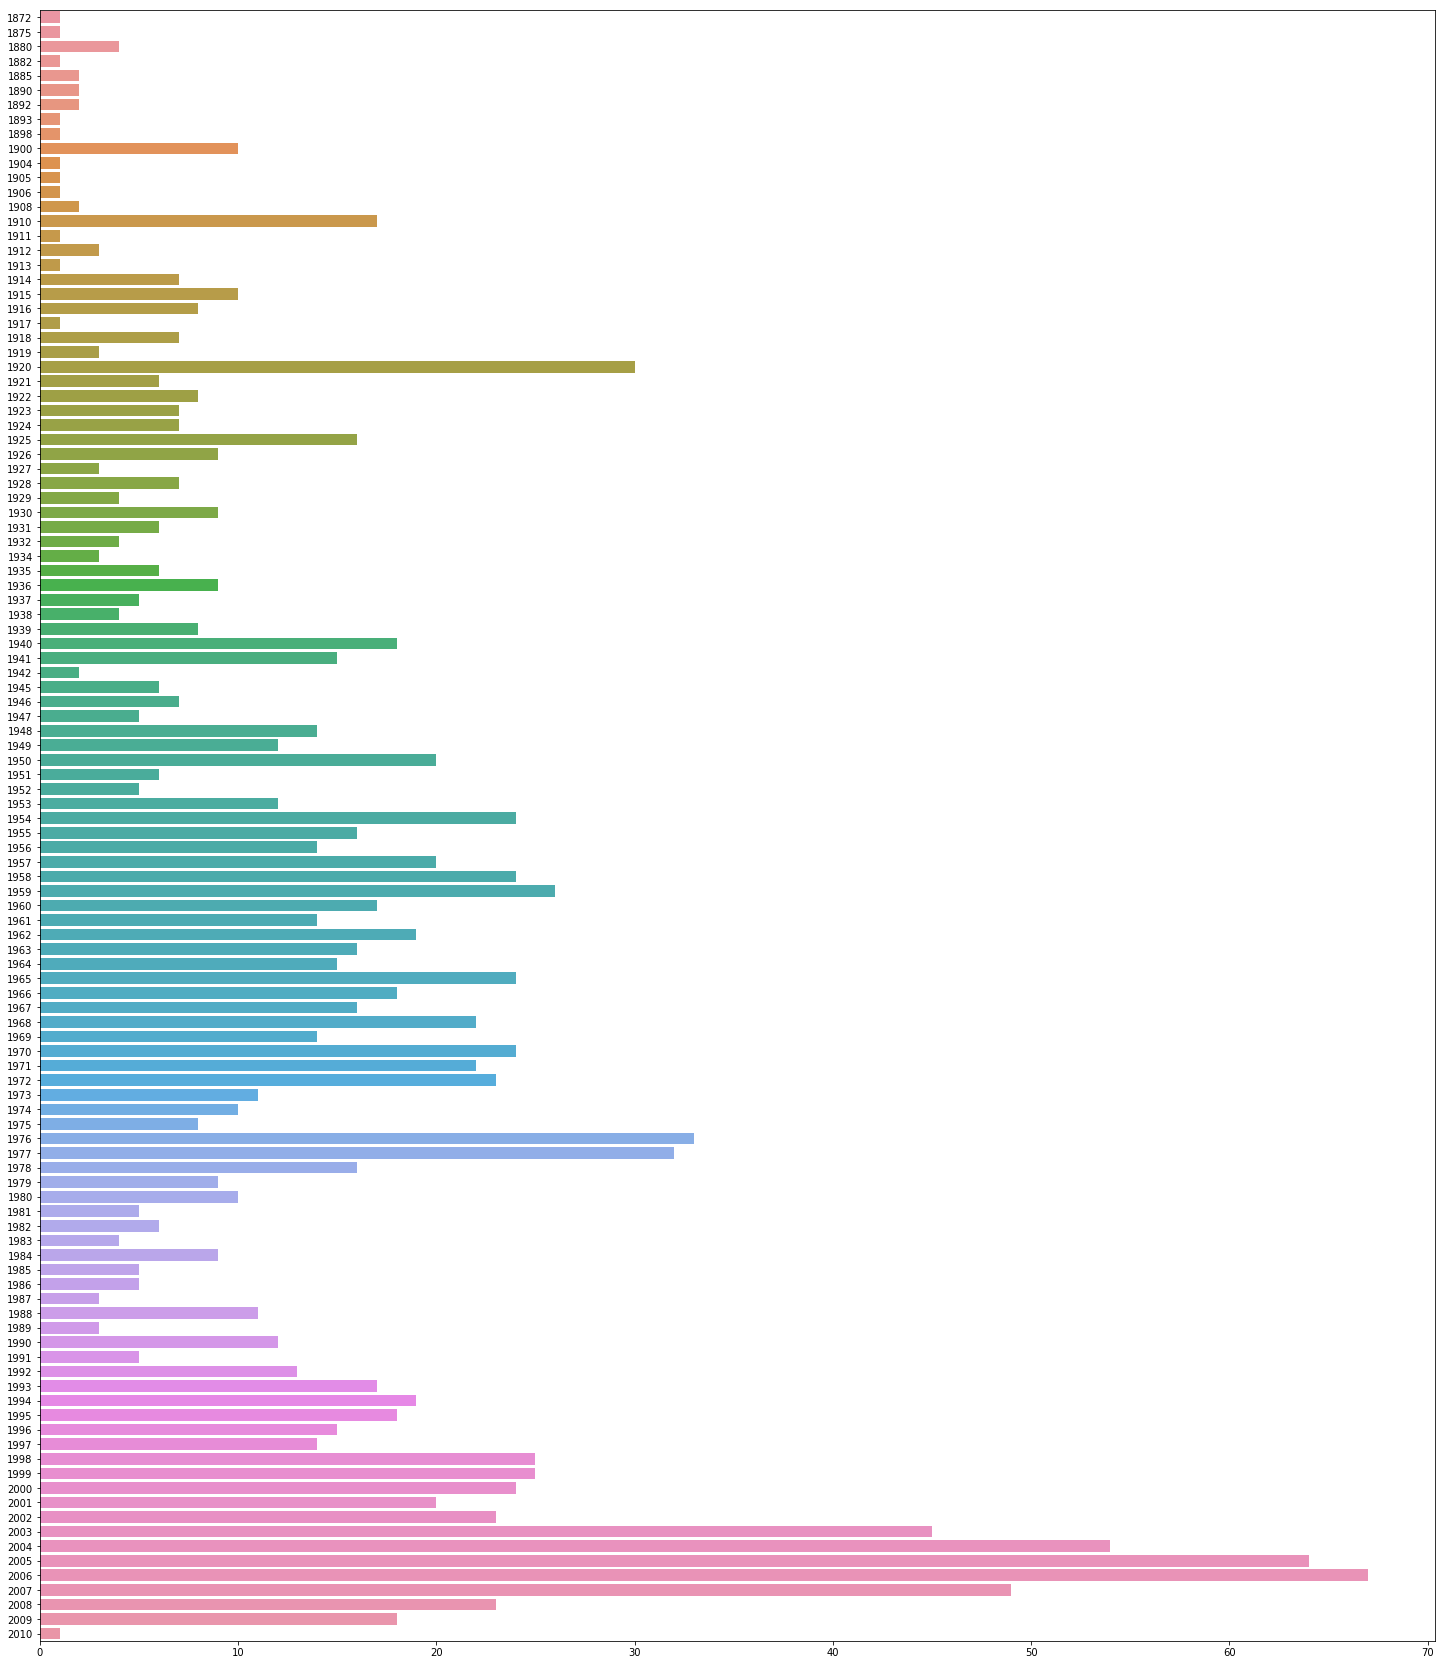

In [125]:
plt.figure(figsize=(25,30))
sb.barplot(x = yearBuiltGroupBy.values, y = yearBuiltGroupBy.index, orient="h")

In [126]:
fullBathCount = dataset.FullBath.value_counts()
fullBathCount

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

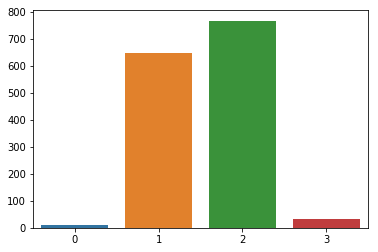

In [127]:
sb.barplot(x = fullBathCount.index, y = fullBathCount.values)

In [128]:
bedRoomCount = dataset.BedroomAbvGr.value_counts()
bedRoomCount

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

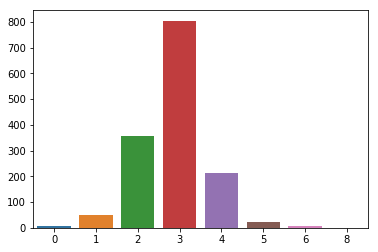

In [129]:
sb.barplot(x = bedRoomCount.index, y = bedRoomCount.values)

In [130]:
totRmCount = dataset.TotRmsAbvGrd.value_counts()
totRmCount

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

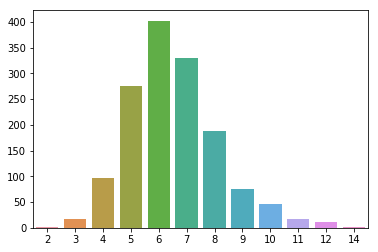

In [131]:
sb.barplot(x = totRmCount.index, y = totRmCount.values)